In [1]:
import pandas as pd
import numpy as np
import scipy
import ujson
import json

In [2]:
# # Opening JSON file
word2id = json.load(open( "docred_data/DocRED_baseline_metadata/word2id.json") )
rel2id = json.load(open("docred_data/DocRED_baseline_metadata/rel2id.json"))
ner2id = json.load(open( "docred_data/DocRED_baseline_metadata/ner2id.json") )
test = json.load(open("docred_data/Test_File_Created.json"))
train = json.load(open("docred_data/train_annotated.json"))
relinfo = json.load(open("docred_data/rel_info.json"))
dev = json.load(open("docred_data/dev.json"))


In [3]:
train_new = json.load(open("docred_data/new_train_annotated.json"))
len(train_new)
# smaller_train_new = train_new[:10]

# train_new = json.load(open("docred_data/new_train_annotated.json"))
# smaller_train_new = train_new[:10]
# out_file = open("docred_data/new_dev_annotated.json", "w")  
# json.dump(smaller_train_new, out_file)
# out_file.close()



3053

In [4]:
3053/4

763.25

In [5]:
result = json.load(open("result.json"))
result
len(result)

113

In [6]:
test_new = json.load(open("docred_data/new_dev_annotated.json"))
len(test_new)

10

In [29]:
test_new = json.load(open("docred_data/Test_File_Created.json"))
print( test_new[0]['vertexSet'][2][0])
print(test_new[0]['vertexSet'][5][0])


{'pos': [5, 6], 'type': 'MISC', 'sent_id': 3, 'name': 'kinase'}
{'pos': [18, 19], 'type': 'MISC', 'sent_id': 8, 'name': 'PDGFRB'}


In [36]:
ixd = 0
first_doc = test_new[ixd]['vertexSet']
print(test_new[ixd]['title'])
for i in range(len(first_doc)):
    print(i, first_doc[i][0]['name'])


Acute lymphoblastic leukemia  ALL   precursor B lymphoblastic leukemia 
0 BCR
1 ABL1
2 kinase
3 ABL class family
4 ABL2
5 PDGFRB
6 PDGFRA
7 colony - stimulating factor 1 receptor
8 JAK2 class family
9 JAK2
10 CRLF2
11 EPOR
12 tyrosine kinase
13 acute lymphoblastic leukemia / lymphoma
14 B - ALL
15 ALL
16 tyrosine
17 hematopoietic neoplasms
18 ABL
19 CSF1R


In [35]:
full_para = ''
for i in range(len(test_new[0]['sents'])):
    for j in range(len(test_new[0]['sents'][i])):
        full_para = full_para + ' ' + test_new[0]['sents'][i][j]

full_para

' Context . — : In the 2016 update of the World Health Organization ( WHO ) classification of hematopoietic neoplasms , BCR - ABL1 - like B - acute lymphoblastic leukemia / lymphoma ( B - ALL ) is added as a new provisional entity that lacks the BCR - ABL1 translocation but shows a pattern of gene expression very similar to that seen in B - ALL with BCR - ABL1 . Objective . — : To review the kinase - activating alterations and the diagnostic approach for BCR - ABL1 - like B - ALL . Data sources . — : We provide a comprehensive review of BCR - ABL1 - like B - ALL based on recent literature and the 2016 update of the World Health Organization classification of hematopoietic neoplasms . Conclusions . — : Several types of kinase - activating alterations ( fusions or mutations ) are identified in BCR - ABL1 - like B - ALL . The main categories are alterations in the ABL class family of genes , encompassing ABL1 , ABL2 , PDGFRB , PDGFRA ( rare ) , and colony - stimulating factor 1 receptor (

In [7]:
result

[{'title': 'Acute lymphoblastic leukemia  ALL   precursor B lymphoblastic leukemia Doc_5',
  'h_idx': 3,
  't_idx': 4,
  'r': 'P17'},
 {'title': 'Acute lymphoblastic leukemia  ALL   precursor B lymphoblastic leukemia Doc_9',
  'h_idx': 1,
  't_idx': 3,
  'r': 'P17'},
 {'title': 'Acute lymphoblastic leukemia  ALL   precursor B lymphoblastic leukemia Doc_9',
  'h_idx': 1,
  't_idx': 8,
  'r': 'P17'},
 {'title': 'Acute lymphoblastic leukemia  ALL   precursor B lymphoblastic leukemia Doc_9',
  'h_idx': 1,
  't_idx': 32,
  'r': 'P17'},
 {'title': 'Acute lymphoblastic leukemia  ALL   precursor B lymphoblastic leukemia Doc_9',
  'h_idx': 9,
  't_idx': 3,
  'r': 'P17'},
 {'title': 'Acute lymphoblastic leukemia  ALL   precursor B lymphoblastic leukemia Doc_9',
  'h_idx': 9,
  't_idx': 8,
  'r': 'P17'},
 {'title': 'Acute lymphoblastic leukemia  ALL   precursor B lymphoblastic leukemia Doc_9',
  'h_idx': 9,
  't_idx': 32,
  'r': 'P17'},
 {'title': 'Acute lymphoblastic leukemia  ALL   precursor B 

In [4]:
import torch
torch.__version__
a = np.array([1,2,3])
at = torch.Tensor(a)
print(torch.cuda.memory_allocated())
x = at.cpu().detach().numpy()
at = None
print('detach', at)
print(torch.cuda.memory_allocated())

0
detach None
0


In [5]:
from transformers import AutoModel, AutoConfig
config = AutoConfig.from_pretrained(
        'roberta-large',
        num_labels=2,
    )
rl = AutoModel.from_pretrained('roberta-large', config = config)
rl

Some weights of the model checkpoint at roberta-large were not used when initializing RobertaModel: ['lm_head.decoder.weight', 'lm_head.layer_norm.bias', 'lm_head.dense.bias', 'lm_head.layer_norm.weight', 'lm_head.dense.weight', 'lm_head.bias']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


RobertaModel(
  (embeddings): RobertaEmbeddings(
    (word_embeddings): Embedding(50265, 1024, padding_idx=1)
    (position_embeddings): Embedding(514, 1024, padding_idx=1)
    (token_type_embeddings): Embedding(1, 1024)
    (LayerNorm): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): RobertaEncoder(
    (layer): ModuleList(
      (0): RobertaLayer(
        (attention): RobertaAttention(
          (self): RobertaSelfAttention(
            (query): Linear(in_features=1024, out_features=1024, bias=True)
            (key): Linear(in_features=1024, out_features=1024, bias=True)
            (value): Linear(in_features=1024, out_features=1024, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): RobertaSelfOutput(
            (dense): Linear(in_features=1024, out_features=1024, bias=True)
            (LayerNorm): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
            (d

In [6]:
rl1 = AutoModel.from_pretrained('roberta-base', config = AutoConfig.from_pretrained(
        'roberta-base',
        num_labels=2,
    ))

rl1

Some weights of the model checkpoint at roberta-base were not used when initializing RobertaModel: ['lm_head.decoder.weight', 'lm_head.layer_norm.bias', 'lm_head.dense.bias', 'lm_head.layer_norm.weight', 'lm_head.dense.weight', 'lm_head.bias']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


RobertaModel(
  (embeddings): RobertaEmbeddings(
    (word_embeddings): Embedding(50265, 768, padding_idx=1)
    (position_embeddings): Embedding(514, 768, padding_idx=1)
    (token_type_embeddings): Embedding(1, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): RobertaEncoder(
    (layer): ModuleList(
      (0): RobertaLayer(
        (attention): RobertaAttention(
          (self): RobertaSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): RobertaSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
            (dropout): Drop

In [7]:
rl1.resize_token_embeddings(30000)
rl1.config


RobertaConfig {
  "_name_or_path": "roberta-base",
  "architectures": [
    "RobertaForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "bos_token_id": 0,
  "classifier_dropout": null,
  "eos_token_id": 2,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-05,
  "max_position_embeddings": 514,
  "model_type": "roberta",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 1,
  "position_embedding_type": "absolute",
  "transformers_version": "4.12.5",
  "type_vocab_size": 1,
  "use_cache": true,
  "vocab_size": 30000
}

In [11]:
import gc
gc.collect()

20

In [3]:
# Make smaller test file
test_smaller = test[:5]

out_file = open("docred_data/Even_smaller_test.json", "w")  
json.dump(test_smaller, out_file)
out_file.close()

In [4]:
output = json.load(open("Result.json"))
output


[{'title': 'AirAsia Zest', 'h_idx': 0, 't_idx': 2, 'r': 'P159'},
 {'title': 'AirAsia Zest', 'h_idx': 0, 't_idx': 4, 'r': 'P17'},
 {'title': 'AirAsia Zest', 'h_idx': 0, 't_idx': 16, 'r': 'P576'},
 {'title': 'AirAsia Zest', 'h_idx': 1, 't_idx': 2, 'r': 'P131'},
 {'title': 'AirAsia Zest', 'h_idx': 1, 't_idx': 4, 'r': 'P17'},
 {'title': 'AirAsia Zest', 'h_idx': 1, 't_idx': 5, 'r': 'P131'},
 {'title': 'AirAsia Zest', 'h_idx': 2, 't_idx': 3, 'r': 'P131'},
 {'title': 'AirAsia Zest', 'h_idx': 2, 't_idx': 4, 'r': 'P17'},
 {'title': 'AirAsia Zest', 'h_idx': 3, 't_idx': 2, 'r': 'P150'},
 {'title': 'AirAsia Zest', 'h_idx': 3, 't_idx': 4, 'r': 'P17'},
 {'title': 'AirAsia Zest', 'h_idx': 3, 't_idx': 4, 'r': 'P131'},
 {'title': 'AirAsia Zest', 'h_idx': 3, 't_idx': 5, 'r': 'P150'},
 {'title': 'AirAsia Zest', 'h_idx': 4, 't_idx': 3, 'r': 'P150'},
 {'title': 'AirAsia Zest', 'h_idx': 5, 't_idx': 3, 'r': 'P131'},
 {'title': 'AirAsia Zest', 'h_idx': 5, 't_idx': 4, 'r': 'P17'},
 {'title': 'AirAsia Zest', 'h

In [23]:
len(test)

46

In [34]:
# new_test = train[:2]
# out_file = open("docred_data/New_smaller_test1.json", "w")  
# # json.dump(new_test, out_file)
# out_file.close()

# new_test_load = json.load(open("docred_data/New_smaller_test1.json"))
# new_test_load

In [29]:
ner2id

{'BLANK': 0, 'ORG': 1, 'LOC': 2, 'TIME': 3, 'PER': 4, 'MISC': 5, 'NUM': 6}

In [14]:
id2rel = {value: key for key, value in rel2id.items()}
id2rel

{79: 'P1376',
 27: 'P607',
 73: 'P136',
 63: 'P137',
 2: 'P131',
 11: 'P527',
 38: 'P1412',
 33: 'P206',
 77: 'P205',
 52: 'P449',
 34: 'P127',
 49: 'P123',
 66: 'P86',
 85: 'P840',
 72: 'P355',
 93: 'P737',
 84: 'P740',
 94: 'P190',
 71: 'P576',
 68: 'P749',
 65: 'P112',
 40: 'P118',
 1: 'P17',
 14: 'P19',
 19: 'P3373',
 42: 'P6',
 44: 'P276',
 24: 'P1001',
 62: 'P580',
 83: 'P582',
 64: 'P585',
 18: 'P463',
 87: 'P676',
 46: 'P674',
 10: 'P264',
 43: 'P108',
 17: 'P102',
 81: 'P25',
 3: 'P27',
 26: 'P26',
 37: 'P20',
 30: 'P22',
 0: 'Na',
 95: 'P807',
 51: 'P800',
 78: 'P279',
 88: 'P1336',
 5: 'P577',
 8: 'P570',
 15: 'P571',
 36: 'P178',
 55: 'P179',
 75: 'P272',
 35: 'P170',
 80: 'P171',
 76: 'P172',
 6: 'P175',
 67: 'P176',
 91: 'P39',
 21: 'P30',
 60: 'P31',
 70: 'P36',
 58: 'P37',
 54: 'P35',
 31: 'P400',
 61: 'P403',
 12: 'P361',
 74: 'P364',
 7: 'P569',
 41: 'P710',
 32: 'P1344',
 82: 'P488',
 59: 'P241',
 57: 'P162',
 9: 'P161',
 47: 'P166',
 20: 'P40',
 23: 'P1441',
 45: 'P

In [18]:
len(id2rel)

97

In [54]:
relinfo

{'P6': 'head of government',
 'P17': 'country',
 'P19': 'place of birth',
 'P20': 'place of death',
 'P22': 'father',
 'P25': 'mother',
 'P26': 'spouse',
 'P27': 'country of citizenship',
 'P30': 'continent',
 'P31': 'instance of',
 'P35': 'head of state',
 'P36': 'capital',
 'P37': 'official language',
 'P39': 'position held',
 'P40': 'child',
 'P50': 'author',
 'P54': 'member of sports team',
 'P57': 'director',
 'P58': 'screenwriter',
 'P69': 'educated at',
 'P86': 'composer',
 'P102': 'member of political party',
 'P108': 'employer',
 'P112': 'founded by',
 'P118': 'league',
 'P123': 'publisher',
 'P127': 'owned by',
 'P131': 'located in the administrative territorial entity',
 'P136': 'genre',
 'P137': 'operator',
 'P140': 'religion',
 'P150': 'contains administrative territorial entity',
 'P155': 'follows',
 'P156': 'followed by',
 'P159': 'headquarters location',
 'P161': 'cast member',
 'P162': 'producer',
 'P166': 'award received',
 'P170': 'creator',
 'P171': 'parent taxon',


In [37]:
# Distant supervised data
train_distant = json.load(open("docred_data/train_distant.json"))
train_distant[0]


{'vertexSet': [[{'pos': [1, 6],
    'type': 'ORG',
    'sent_id': 0,
    'name': 'Worker-Peasant Red Guards'}],
  [{'pos': [7, 8], 'type': 'ORG', 'sent_id': 0, 'name': 'WPRG'}],
  [{'pos': [14, 20],
    'type': 'ORG',
    'sent_id': 0,
    'name': "Workers and Peasants' Red Militia"}],
  [{'pos': [21, 22], 'type': 'ORG', 'sent_id': 0, 'name': 'WPRM'}],
  [{'pos': [29, 31], 'type': 'LOC', 'sent_id': 0, 'name': 'North Korea'},
   {'pos': [8, 10], 'type': 'LOC', 'sent_id': 1, 'name': 'North Korea'}],
  [{'pos': [4, 8], 'type': 'TIME', 'sent_id': 2, 'name': 'January 14, 1959'}],
  [{'pos': [9, 13], 'type': 'PER', 'sent_id': 2, 'name': 'Kim Il-sung'}],
  [{'pos': [18, 21],
    'type': 'ORG',
    'sent_id': 2,
    'name': 'State Affairs Commission'}],
  [{'pos': [23, 24], 'type': 'TIME', 'sent_id': 2, 'name': '2016'}],
  [{'pos': [24, 27],
    'type': 'ORG',
    'sent_id': 2,
    'name': 'National Defense Commission'}],
  [{'pos': [29, 35],
    'type': 'ORG',
    'sent_id': 2,
    'name': "M

In [39]:
dev[0]

{'vertexSet': [[{'pos': [0, 2],
    'type': 'ORG',
    'sent_id': 4,
    'name': 'Skai TV'},
   {'pos': [0, 2], 'type': 'ORG', 'sent_id': 0, 'name': 'Skai TV'},
   {'pos': [3, 5], 'type': 'ORG', 'sent_id': 5, 'name': 'Skai TV'}],
  [{'name': 'Greek', 'pos': [4, 5], 'sent_id': 0, 'type': 'LOC'}],
  [{'name': 'Piraeus', 'pos': [14, 15], 'sent_id': 0, 'type': 'LOC'}],
  [{'name': 'Skai Group', 'pos': [5, 7], 'sent_id': 1, 'type': 'ORG'}],
  [{'pos': [8, 12],
    'type': 'TIME',
    'sent_id': 2,
    'name': '1st of April 2006'}],
  [{'name': 'Athens', 'pos': [14, 15], 'sent_id': 2, 'type': 'LOC'}],
  [{'name': 'Nova', 'pos': [16, 17], 'sent_id': 3, 'type': 'ORG'}],
  [{'pos': [18, 20], 'type': 'ORG', 'sent_id': 3, 'name': 'Cosmote TV'}],
  [{'pos': [7, 8], 'type': 'ORG', 'sent_id': 4, 'name': 'Digea'}],
  [{'name': 'Greece', 'pos': [20, 21], 'sent_id': 4, 'type': 'LOC'},
   {'name': 'Greece', 'pos': [5, 6], 'sent_id': 6, 'type': 'LOC'}],
  [{'sent_id': 5, 'type': 'MISC', 'pos': [13, 14], 

In [ ]:
# Create binary dataset
for i in range(len(train)):
    




In [17]:
nt = train.copy()

for i in range(len(nt)):
    for j in range(len( nt[i]['labels'] ) ):
        nt[i]['labels'][j]['r'] = 'P17'
        

In [18]:
out_file = open("docred_data/new_train_annotated.json", "w")  
json.dump(nt, out_file)
out_file.close()

In [65]:
# Create new rel2id.json file
new_rel2id = {'P17':1, 'Na': 0}
out_file = open("meta/rel2id.json", "w")  
json.dump(new_rel2id, out_file)
out_file.close()

In [20]:
docred_rel2id = json.load(open('meta/rel2id.json', 'r'))
docred_rel2id

{'P17': 1, 'Na': 0}

In [207]:
dev_train_bert_word = np.load('prepro_data/dev_train_bert_word.npy')
dev_train_bert_starts = np.load('prepro_data/dev_train_bert_starts.npy')
dev_train_bert_mask = np.load('prepro_data/dev_train_bert_mask.npy')
dev_train_word = np.load('prepro_data/dev_train_word.npy')


print(dev_train_bert_word.shape, dev_train_bert_starts.shape, dev_train_bert_mask.shape, dev_train_word.shape)


(3053, 512) (3053, 512) (3053, 512) (3053, 512)


In [58]:
new_test = json.load(open("500_entities_Test_File_Created.json"))
len(new_test)


519

In [7]:
import torch

In [8]:
htr = torch.load('relation_exists_embedding')
len(htr)


38

In [9]:
all_val = []
# for i in range(len(htr)):
#     for j in htr[i]:
#         all_val.append(j)
ht_rep_df = np.array(htr)

In [10]:
print(ht_rep_df.shape) # 20 entities - creates pairs 1,2,3 (1,2), (1,3), (2,3)

(38, 2304)


In [53]:
# torch.Size([30, 104, 353]) torch.Size([30, 104, 353])
# torch.Size([30, 353, 128])


In [4]:
## Dimensionality Reduction
import numpy as np
import pandas as pd
import time

# For plotting
import plotly.io as plt_io
import plotly.graph_objects as go
%matplotlib inline

#PCA
from sklearn.decomposition import PCA
#TSNE
from sklearn.manifold import TSNE
#UMAP
import umap
#LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [5]:
from sklearn.cluster import DBSCAN
from sklearn.cluster import SpectralClustering
import matplotlib.pyplot as plt
from numpy import random
from sklearn import metrics


In [61]:
def plot_2d(component1, component2):
    
    fig = go.Figure(data=go.Scatter(
        x = component1,
        y = component2,
        mode='markers',
        marker=dict(
            size=20,
            color=y, #set color equal to a variable
            colorscale='Rainbow', # one of plotly colorscales
            showscale=True,
            line_width=1
        )
    ))
    fig.update_layout(margin=dict( l=100,r=100,b=100,t=100),width=2000,height=1200)                 
    fig.layout.template = 'plotly_dark'
    
    fig.show()

In [56]:
import gc
gc.collect()

245

In [33]:

# ht_rep_df = pd.DataFrame()

# ht_rep_df.head()

In [11]:
# Standardizing inputs
from sklearn.preprocessing import StandardScaler
## Standardizing the data
# x = ht_rep_df.values
x = ht_rep_df

x = StandardScaler().fit_transform(x)


In [12]:
x.shape # just for 50 documents - we have 20k

(38, 2304)

In [85]:
# x = ht_rep_df

In [13]:
# PCA
start = time.time()
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
print('Duration: {} seconds'.format(time.time() - start))
# principal = pd.DataFrame(data = principalComponents
#              , columns = ['principal component 1', 'principal component 2','principal component 3'])
principal = pd.DataFrame(data = principalComponents)

Duration: 0.05800461769104004 seconds


In [14]:
principal.head()

,0,1
0,-28.642467,14.233615
1,-17.998579,-3.885584
2,3.246992,-24.398270
3,8.734564,-19.864244
4,-14.705691,0.197096


In [15]:
principal.tail()

,0,1
33,9.076842,-26.243383
34,11.239310,-23.414240
35,52.732128,25.767946
36,42.758614,-27.552578
37,38.223789,48.567429


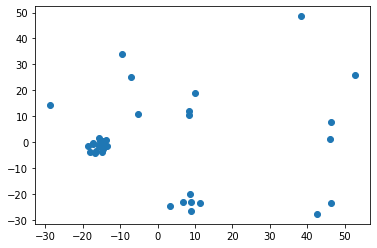

In [16]:
plt.scatter(principalComponents[:,0], principalComponents[:,1])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1
 1] 38


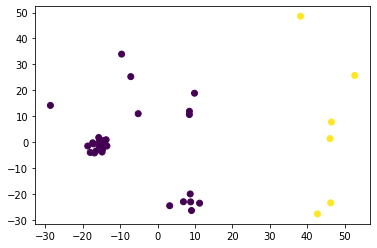

In [33]:
from sklearn.cluster import KMeans
k_means=KMeans(n_clusters=2,random_state=100)
k_means.fit(principalComponents)

labels = k_means.labels_
print(labels, len(labels))
plt.scatter(principalComponents[:,0], principalComponents[:,1], c=labels)
plt.show()  

38


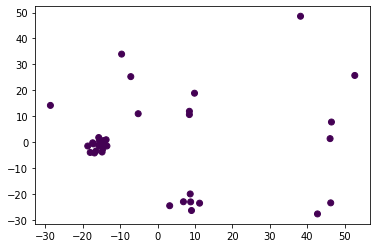

In [18]:
from sklearn.cluster import DBSCAN
dbscan=DBSCAN()
dbscan.fit(principalComponents)

labels = dbscan.labels_
print(len(labels))
plt.scatter(principalComponents[:,0], principalComponents[:,1], c=labels)
plt.show() 

c:\users\papu_\appdata\local\programs\python\python37\lib\site-packages\sklearn\manifold\_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1] 38


c:\users\papu_\appdata\local\programs\python\python37\lib\site-packages\sklearn\cluster\_kmeans.py:294: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  ).fit(X, sample_weight=sample_weight)


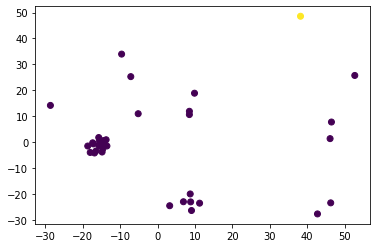

In [23]:
sc = SpectralClustering(n_clusters=3).fit(principalComponents)
labels = sc.labels_
print(labels, len(labels))
plt.scatter(principalComponents[:,0], principalComponents[:,1], c=labels)
plt.show()  

In [54]:
# Umap
start = time.time()
reducer = umap.UMAP(random_state=42,n_components=2)
embedding = reducer.fit_transform(x)
print('Duration: {} seconds'.format(time.time() - start))

Duration: 0.8709993362426758 seconds


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1
 1] 38


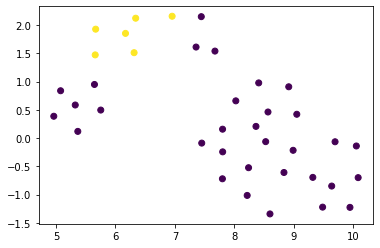

In [55]:
from sklearn.cluster import KMeans
k_means=KMeans(n_clusters=2,random_state=100)
k_means.fit(principalComponents)

labels = k_means.labels_
print(labels, len(labels))
plt.scatter(embedding[:,0], embedding[:,1], c=labels)
plt.show()  

In [29]:
# from sklearn.cluster import DBSCAN
# dbscan=DBSCAN()
# dbscan.fit(principalComponents)

# labels = dbscan.labels_
# print(len(labels))
# plt.scatter(embedding[:,0], embedding[:,1], c=labels)
# plt.show() 

38


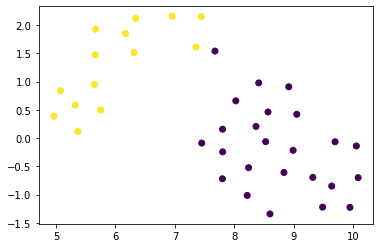

In [56]:
sc = SpectralClustering(n_clusters=2).fit(embedding)
labels = sc.labels_
print(len(labels))
plt.scatter(embedding[:,0], embedding[:,1], c=labels)
plt.show()  

In [31]:
ht_rep_df.shape

(38, 2304)

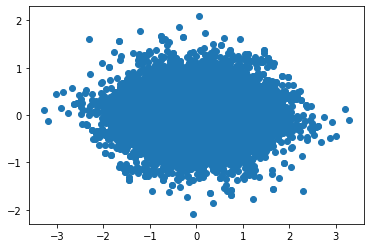

In [93]:
plt.scatter(principalComponents[:,100], principalComponents[:,200])

In [89]:
# Umap
start = time.time()
reducer = umap.UMAP(random_state=42,n_components=3)
embedding = reducer.fit_transform(x)
print('Duration: {} seconds'.format(time.time() - start))

Duration: 26.10832929611206 seconds


In [90]:
from sklearn.cluster import KMeans
k_means=KMeans(n_clusters=3,random_state=100)
k_means.fit(principalComponents)

KMeans(n_clusters=3, random_state=100)

[0 0 1 ... 1 1 0] 21052


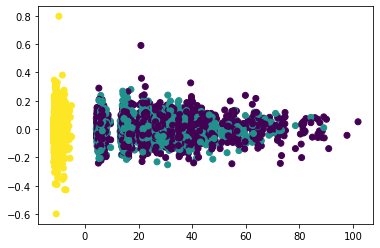

In [95]:
labels = k_means.labels_
print(labels, len(labels))
plt.scatter(principalComponents[:,0], principalComponents[:,-1], c=labels)
plt.show()  

In [ ]:
from sklearn.cluster import KMeans
k_means=KMeans(n_clusters=4,random_state=100)
k_means.fit(principalComponents)

[1 1 2 ... 2 2 1] 21052


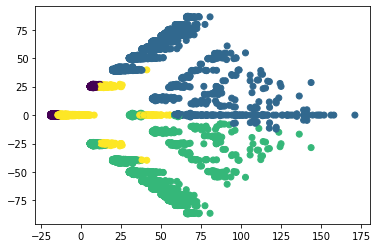

In [60]:
labels = k_means.labels_
print(labels, len(labels))
plt.scatter(principalComponents[:,0], principalComponents[:,1], c=labels)
plt.show()  

In [158]:
l = [('13dampp[c]', -1), ('h2o[c]', -1), ('o2[c]', -1)]


c_in_values = [xi[0] for xi in negative_ind ]
c_out_values = [xi[0] for xi in positive_ind ]


['13dampp[c]', 'h2o[c]', 'o2[c]']

In [62]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=4, affinity='euclidean')
model.fit(principalComponents)

AgglomerativeClustering(n_clusters=4)

21052


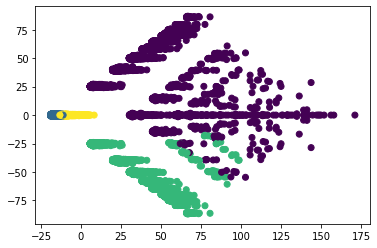

In [64]:
labels = model.labels_
print(len(labels))
plt.scatter(principalComponents[:,0], principalComponents[:,1], c=labels)
plt.show() 

In [65]:
from sklearn.cluster import DBSCAN
dbscan=DBSCAN()
dbscan.fit(principalComponents)

DBSCAN()

21052


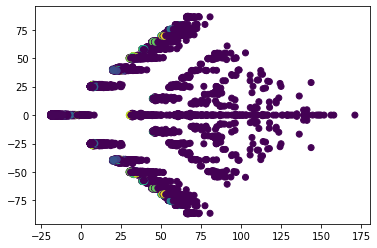

In [66]:
labels = dbscan.labels_
print(len(labels))
plt.scatter(principalComponents[:,0], principalComponents[:,1], c=labels)
plt.show() 

In [67]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=5)
nbrs = neigh.fit(principalComponents)
distances, indices = nbrs.kneighbors(principalComponents)

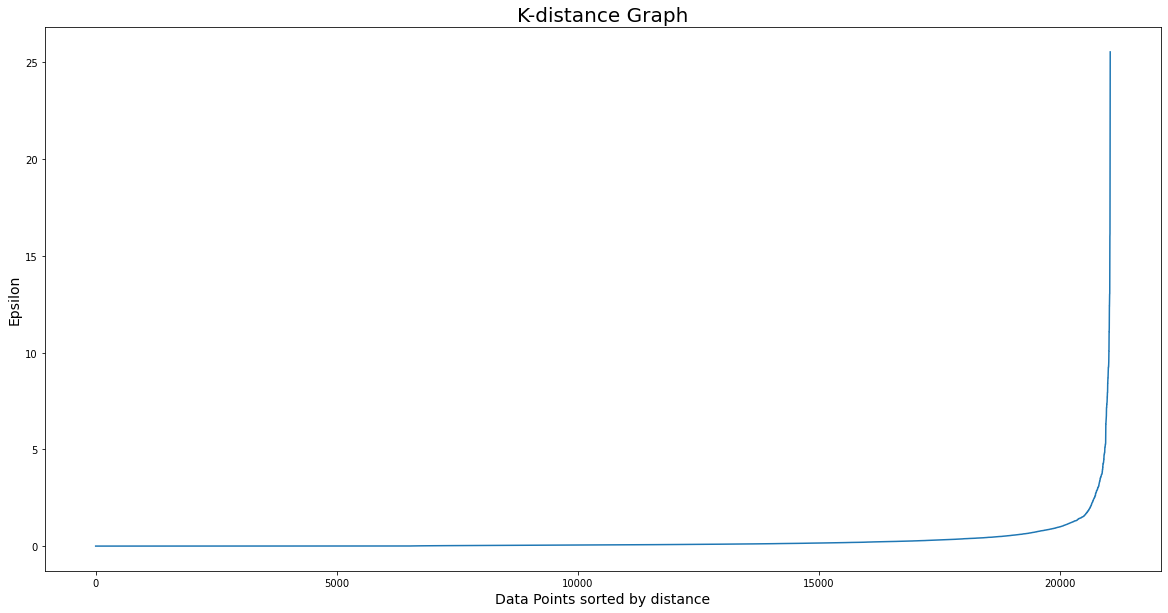

In [68]:
# Plotting K-distance Graph
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(20,10))
plt.plot(distances)
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

In [78]:
from sklearn.cluster import DBSCAN
dbscan_opt=DBSCAN(eps=30,min_samples=100)
dbscan_opt.fit(principalComponents)

DBSCAN(eps=30, min_samples=100)

21052


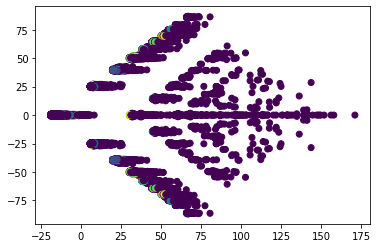

In [79]:
labels = dbscan.labels_
print(len(labels))
plt.scatter(principalComponents[:,0], principalComponents[:,1], c=labels)
plt.show() 

In [57]:
sc = SpectralClustering(n_clusters=4).fit(principalComponents)
print(sc) 


[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 1 1
 3 1 1 1 1 1 3 1 1 1 1 1 2 1 1 0 0 3 3 1 1 1 1 1 0 1 1] 64


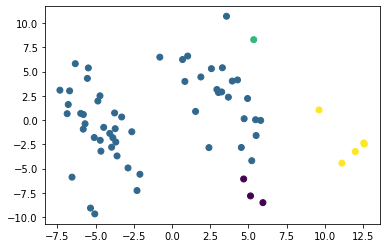

In [71]:
labels = sc.labels_
print(labels, len(labels))
plt.scatter(principalComponents[:,0], principalComponents[:,1], c=labels)
plt.show()  

In [72]:
# plot_2d(principalComponents[:, 0],principalComponents[:, 1])

In [73]:
# clusterer = hdbscan.HDBSCAN(min_cluster_size=10)
# cluster_labels = clusterer.fit_predict(principalComponents)
# cluster_labels

In [74]:
# tsne
start = time.time()
pca_30 = PCA(n_components=30)
pca_result_30 = pca_30.fit_transform(x)
tsne = TSNE(random_state = 42, n_components=3,verbose=0, perplexity=40, n_iter=400).fit_transform(pca_result_30)
print('Duration: {} seconds'.format(time.time() - start))

Duration: 22.143463134765625 seconds


64


/N/u/paswam/Carbonate/.local/lib/python3.6/site-packages/sklearn/manifold/_spectral_embedding.py:245: UserWarning:

Graph is not fully connected, spectral embedding may not work as expected.



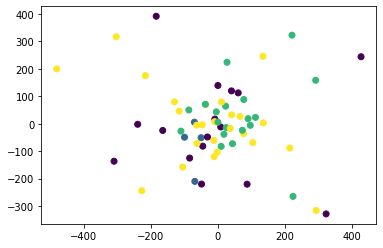

In [75]:
sc = SpectralClustering(n_clusters=4).fit(tsne)
labels = sc.labels_
print(len(labels))
plt.scatter(tsne[:,0], tsne[:,1], c=labels)
plt.show()  

In [76]:
# Umap
start = time.time()
reducer = umap.UMAP(random_state=42,n_components=3)
embedding = reducer.fit_transform(x)
print('Duration: {} seconds'.format(time.time() - start))

Duration: 1.3450329303741455 seconds


64


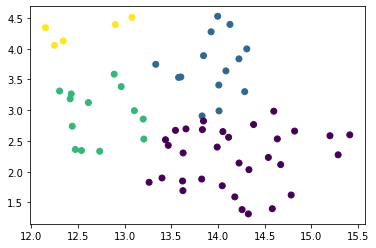

In [77]:
sc = SpectralClustering(n_clusters=4).fit(embedding)
labels = sc.labels_
print(len(labels))
plt.scatter(embedding[:,0], embedding[:,1], c=labels)
plt.show()  

In [81]:
# Possible useful stuffs:
    # Foods/Nutrients and their locations
    # Disease and link to locations (geographical location)
    # Do we want to use common toxins and polluting substance data?
    # Do we want to use all 8000 drugs and drug metabolites data? ( What if many are not related to any disease or metabolism)
    # https://hmdb.ca/
    # Disease risk factors: https://www.cancer.gov/about-cancer/causes-prevention/risk

In [80]:
# Food DB- https://foodb.ca/downloads
# Carcinogens - https://raw.githubusercontent.com/the-ahuja-lab/Metabokiller/main/datasets/Carcinogen/Independent_Dataset_Data.csv

In [79]:
# Questions to ask:
    # Do we want to use common toxins and polluting substance data?
    # Do we want to use all 8000 drugs and drug metabolites data? ( What if many are not related to any disease or metabolism)
    # What to do with non-related h-t-relation? Like some food affecting some other stuff(totally unrelated to diseases or metabolism entity)?
    # 2 clusters or more?

In [4]:
folder_path = 'Disease_Metabolites_Otherfactors_Abstracts/'


In [5]:
# Steps to do:
    # Step 1: Use just diseases, metabolites, food and carnicogen entities (food and carni later)
    # Step 2: All abstracts can be scraped by disease names and metabolism names
    # Step 3: Identify entities in each document - sentence by sentence and get a format similar to docred format
    # Step 4: Match entities only if they are present in any of Step 1
    


In [6]:
disease_risk_factors = ['Age', 'Alcohol', 'Cancer-Causing Substances', 'Chronic Inflammation', 'Diet', 'Hormones', 
                        'Immunosuppression', 'Infectious Agents', 'Obesity', 'Radiation', 'Sunlight', 'Tobacco']
    

In [7]:
# Get all entities in list
import re
with open(folder_path + 'disease') as f:
    contents = f.readlines()

contents[1].split('ENTRY')

disease_list = []
for i in range(1, len(contents)):
    if(contents[i][:4] == 'NAME'):        
        disease_list.append(re.sub(r'[^a-zA-Z0-9]', ' ', contents[i].split('NAME')[-1].split(', including')[0].strip()))
#     if(contents[i][:4] == 'DRUG'):
#         disease_list.append(contents[i].split('DRUG')[0].split('NAME')[-1].strip())
#     if(contents[i][:10] == 'CARCINOGEN'):
#         disease_list.append(contents[i].split('ENTRY')[0].split('NAME')[-1].strip())

In [8]:
diseases_list = json.load(open( folder_path + "malacards-diseases.json") )
len(diseases_list)

for i in range(len(diseases_list)):
    disease_list.append( re.sub(r'[^a-zA-Z0-9]', ' ', diseases_list[i]['disease']) )

In [9]:
len(disease_list)

19958

In [10]:
# Metabolites
metabolite_list = set()
m_ih = pd.read_csv(folder_path + 'metabolites_in_human.csv', encoding = "ISO-8859-1" )
m_ih.shape

(2174, 11)

In [11]:
for i in range(len(m_ih)):
    for j in str(m_ih.iloc[i]['COMPOUND.NAME1']).split(';'):
        if(j != '' and j != 'NaN' and j!= 'nan'):
            metabolite_list.add(j)
    for j in str(m_ih.iloc[i]['COMPOUND.NAME2']).split(';'):
        if(j != '' and j != 'NaN' and j!= 'nan'):
            metabolite_list.add(j)

In [12]:
metabolite_list = list(metabolite_list)
len(metabolite_list)

4954

In [13]:
required_keywords = disease_list + metabolite_list + disease_risk_factors
len(required_keywords)

24924

In [14]:
test[0].keys()

dict_keys(['vertexSet', 'title', 'sents'])

In [15]:
test[0]['vertexSet']

[[{'pos': [0, 3],
   'type': 'PER',
   'sent_id': 0,
   'name': 'Miguel Riofrio Sánchez'},
  {'pos': [0, 1], 'type': 'PER', 'sent_id': 5, 'name': 'Riofrio'},
  {'pos': [23, 25], 'type': 'PER', 'sent_id': 4, 'name': 'Miguel Riofrío'}],
 [{'pos': [4, 8], 'type': 'TIME', 'sent_id': 0, 'name': 'September 7 , 1822'}],
 [{'pos': [9, 13], 'type': 'TIME', 'sent_id': 0, 'name': 'October 11 , 1879'}],
 [{'name': 'Ecuadoran', 'pos': [16, 17], 'sent_id': 0, 'type': 'LOC'},
  {'name': 'Ecuador', 'pos': [9, 10], 'sent_id': 2, 'type': 'LOC'},
  {'name': 'Ecuador', 'pos': [32, 33], 'sent_id': 3, 'type': 'LOC'},
  {'name': 'Ecuador', 'pos': [32, 33], 'sent_id': 4, 'type': 'LOC'}],
 [{'name': 'Loja', 'pos': [7, 8], 'sent_id': 1, 'type': 'LOC'}],
 [{'pos': [13, 15], 'type': 'MISC', 'sent_id': 2, 'name': 'La Emancipada'},
  {'pos': [26, 28], 'type': 'MISC', 'sent_id': 4, 'name': 'La Emancipada'}],
 [{'pos': [16, 17], 'type': 'TIME', 'sent_id': 2, 'name': '1863'}],
 [{'sent_id': 3, 'type': 'NUM', 'pos': [1

In [25]:
test[0]['sents'][:2]

[['Miguel',
  'Riofrio',
  'Sánchez',
  '(',
  'September',
  '7',
  ',',
  '1822',
  '–',
  'October',
  '11',
  ',',
  '1879',
  ')',
  'was',
  'an',
  'Ecuadoran',
  'poet',
  ',',
  'novelist',
  ',',
  'journalist',
  ',',
  'orator',
  ',',
  'and',
  'educator',
  '.'],
 ['He', 'was', 'born', 'in', 'the', 'city', 'of', 'Loja', '.']]

In [19]:
from nltk import tokenize
p = "Good morning Dr. Adams. The patient is waiting for you in room number 3."
tokenize.sent_tokenize(p)

['Good morning Dr. Adams.', 'The patient is waiting for you in room number 3.']

In [30]:

# import spacy
# from spacy import displacy
# nlp = spacy.load("en_core_web_sm")

# text = "Tumorigenesis is dependent on the reprogramming of cellular metabolism as both direct and indirect consequence of oncogenic mutations. A common feature of cancer cell metabolism is the ability to acquire necessary nutrients from a frequently nutrient-poor environment and utilize these nutrients to both maintain viability and build new biomass. The alterations in intracellular and extracellular metabolites that can accompany cancer-associated metabolic reprogramming have profound effects on gene expression, cellular differentiation and the tumor microenvironment. In this Review, we have organized known cancer-associated metabolic changes into six hallmarks: (1) deregulated uptake of glucose and amino acids, (2) use of opportunistic modes of nutrient acquisition, (3) use of glycolysis/TCA cycle intermediates for biosynthesis and NADPH production, (4) increased demand for nitrogen, (5) alterations in metabolite-driven gene regulation, and (6) metabolic interactions with the microenvironment. While few tumors display all six hallmarks, most display several. The specific hallmarks exhibited by an individual tumor may ultimately contribute to better tumor classification and aid in directing treatment."

# doc = nlp(text)
# displacy.render(doc, style="ent")



In [4]:
# import requests

# def query_raw(text, url="https://bern.korea.ac.kr/plain"):
# re   return requests.post(url, data={'sample_text': text}).json()

# print(query_raw("YOUR TEXT HERE"))

In [15]:
test_data = pd.read_csv('./biobert/datasets/NER/NCBI-disease/test.tsv', sep = '\t')

In [16]:
# Reading abstracts for all keywords

In [38]:
import csv 
from nltk import tokenize

start_index = 0
# end_index = 500
end_index = 5
document_index = 0

# Do in separate loops
for file_index in range(0, 1):
    
    out_file = open('Literature_Data_Words_'+str(start_index)+'_'+str(end_index)+'.tsv', 'wt') 
    tsv_writer = csv.writer(out_file, delimiter='\t')

    if(file_index == 49):
        end_index = 24924

    for i in range(start_index, end_index): 

        if(i%100 == 0): 
            print(i) 

        # to get abstracts
        disease_name = required_keywords[i] # breast cancer and metabolism
        fc = 0
        with open('keywords.txt', 'w') as f:
            f.write(disease_name)
            fc = 1

        # run the pubmed scraper
        try:
        #     os.system('python3 async-pubmed-scraper/async_pubmed_scraper --start 2020 --output article_data')
        #     subprocess.call('python3 async_pubmed_scraper.py --start 2020 --output article_data')

            !python3 'async_pubmed_scraper.py'

            # Once output file is created, parse it and get necessary values
            if(fc == 1):

                file = 'article_data.csv'
                abs_pbs = pd.read_csv(file)

                # now run the rev_irrev function
                outputs = []
                abstracts = abs_pbs['abstract']
                print('Number of abstracts for ', disease_name, ' is ', len(abstracts))

                for j in range(len(abstracts)):

                    if(j!=0):
                        document_index += 1
                        tsv_writer.writerow(['ENDOFDOCUMENT', 'O', 'ENDOFDOCUMENT', 'ENDOFDOCUMENT', 'ENDOFDOCUMENT']) # word, ner_sample, sent_id, doc_id, doc_title
#                         tsv_writer.writerow([' ', ' ', 'ENDOFDOCUMENT', 'ENDOFDOCUMENT', 'ENDOFDOCUMENT'])
                        
                    text = str(abstracts.iloc[j])
                    if(text):
                        text = text.replace('\n', ' ')
                        text = text.replace('\t', ' ')
                        text = text.replace('(', ' ( ')
                        text = text.replace('%', ' % ')
                        text = text.replace('$', ' $ ')
                        text = text.replace('@', ' @ ')
                        text = text.replace('#', ' # ')
                        text = text.replace('^', ' ^ ')
                        text = text.replace('&', ' & ')
                        text = text.replace('+', ' + ')
                        text = text.replace('{', ' { ')
                        text = text.replace('}', ' } ')
                        text = text.replace('[', ' [ ')
                        text = text.replace(']', ' ] ')
                        text = text.replace('?', ' ? ')
                        text = text.replace('<', ' < ')
                        text = text.replace('>', ' > ')
                        text = text.replace(')', ' ) ')
                        text = text.replace(':', ' : ')
                        text = text.replace(',', ' , ')
                        text = text.replace('.', ' . ')
                        text = text.replace('-', ' - ')
                        text = text.replace('_', ' _ ')
                        text = text.replace(';', ' ; ')
                        text = text.replace('!', ' ! ')
                        text = text.replace('*', ' * ')
                        text = text.replace('/', ' / ')
                        text = text.replace('=', ' = ')
                        text = text.replace("'", " ' ")
                        text = text.replace('"', ' " ')
#                             text = text.split()
                        all_sents = tokenize.sent_tokenize(text)
                        for sent_index in range(len(all_sents)):
                            for wordy in all_sents[sent_index].split():
                                tsv_writer.writerow([wordy, 'O', int(sent_index), int(document_index), str(disease_name)])

        except:
            print('error at', i)

    out_file.close()
    start_index = end_index
    end_index+=5


In [23]:
# Combine them
data1 = pd.read_csv('Literature_Data_Words_0_500.tsv', sep='\t', header=None)
data2 = pd.read_csv('Literature_Data_Words_500_1000.tsv', sep='\t', header=None)
print(data1.shape, data2.shape)
all_data = pd.concat([data1,data2], axis=0)
all_data.to_csv('test_0_1000.tsv', sep = '\t', index=False, header=None)


(1029223, 5) (922483, 5)


In [24]:
all_data.tail()

,0,1,2,3,4
922478,with,O,2.0,7875.0,C syndrome
922479,recent,O,2.0,7875.0,C syndrome
922480,SARS-CoV-2,O,2.0,7875.0,C syndrome
922481,infection,O,2.0,7875.0,C syndrome
922482,.,O,2.0,7875.0,C syndrome


In [51]:
sample_test = pd.read_csv('Literature_Data_Words_0_1.tsv', sep='\t', header=None)
print(sample_test.shape)

(1823, 5)


In [63]:
sample_test[sample_test.columns[:2]].to_csv('sample_test.tsv', sep = '\t', index=False, header=None)

In [64]:
sample_test.head()

,0,1,2,3,4
0,Lymphoblastic,O,0.0,0.0,Acute lymphoblastic leukemia ALL precursor ...
1,leukemias,O,0.0,0.0,Acute lymphoblastic leukemia ALL precursor ...
2,/,O,0.0,0.0,Acute lymphoblastic leukemia ALL precursor ...
3,lymphomas,O,0.0,0.0,Acute lymphoblastic leukemia ALL precursor ...
4,are,O,0.0,0.0,Acute lymphoblastic leukemia ALL precursor ...


In [41]:

# import argparse
# import time
# from bs4 import BeautifulSoup
# import pandas as pd
# import random
# import requests
# import asyncio
# import aiohttp
# import socket

# # global articles_data

# def extract_by_article(url):
#     '''
#     Extracts all data from a single article
#     :param url: string: URL to a single article (i.e. root pubmed URL + PMID)
#     :return article_data: Dict: Contains all data from a single article
#     '''
#     articles_data = []
#     conn = aiohttp.TCPConnector(family=socket.AF_INET)
#     headers = {
#             'User-Agent':"Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:55.0) Gecko/20100101 Firefox/55.0",
#             }
#     # Reference our articles DataFrame containing accumulated data for ALL scraped articles
#     # global articles_data
#     s = requests.Session()
#     print(url)
# #     with aiohttp.ClientSession(headers=headers, connector=conn) as session:
#     with s.get(url) as response:
#         data = response.text
#         soup = BeautifulSoup(data, "lxml")
#         # Get article abstract if exists - sometimes abstracts are not available (not an error)
#         try:
#             abstract_raw = soup.find('div', {'class': 'abstract-content selected'}).find_all('p')
#             # Some articles are in a split background/objectives/method/results style, we need to join these paragraphs
#             abstract = ' '.join([paragraph.text.strip() for paragraph in abstract_raw])
#         except:
#             abstract = 'NO_ABSTRACT'
#         # # Get author affiliations - sometimes affiliations are not available (not an error)
#         # affiliations = [] # list because it would be difficult to split since ',' exists within an affiliation
#         # try:
#         #     all_affiliations = soup.find('ul', {'class':'item-list'}).find_all('li')
#         #     for affiliation in all_affiliations:
#         #         affiliations.append(affiliation.get_text().strip())
#         # except:
#         #     affiliations = 'NO_AFFILIATIONS'
#         # Get article keywords - sometimes keywords are not available (not an error)
#         try:
#             # We need to check if the abstract section includes keywords or else we may get abstract text
#             has_keywords = soup.find_all('strong',{'class':'sub-title'})[-1].text.strip()
#             if has_keywords == 'Keywords:':
#                 # Taking last element in following line because occasionally this section includes text from abstract
#                 keywords = soup.find('div', {'class':'abstract' }).find_all('p')[-1].get_text()
#                 keywords = keywords.replace('Keywords:','\n').strip() # Clean it up
#             else:
#                 keywords = 'NO_KEYWORDS'
#         except:
#             keywords = 'NO_KEYWORDS'
#         try:
#             title = soup.find('meta',{'name':'citation_title'})['content'].strip('[]')
#         except:
#             title = 'NO_TITLE'
#         authors = ''    # string because it's easy to split a string on ','
#         # try:
#         #     for author in soup.find('div',{'class':'authors-list'}).find_all('a',{'class':'full-name'}):
#         #         authors += author.text + ', '
#         #     # alternative to get citation style authors (no first name e.g. I. Zenkov)
#         #     # all_authors = soup.find('meta', {'name': 'citation_authors'})['content']
#         #     # [authors.append(author) for author in all_authors.split(';')]
#         # except:
#         #     authors = ('NO_AUTHOR')
#         try:
#             journal = soup.find('meta',{'name':'citation_journal_title'})['content']
#         except:
#             journal = 'NO_JOURNAL'
#         # try:
#         #     date = soup.find('time', {'class': 'citation-year'}).text
#         # except:
#         #     date = 'NO_DATE'

#         # Format data as a dict to insert into a DataFrame
#         article_data = {
#             'url': url,
#             'title': title,
#             'abstract': abstract,
#             'journal': journal,
#             'keywords': keywords
#         }
            

#     return article_data

# def get_pmids(page, keyword):
#     """
#     Extracts PMIDs of all articles from a pubmed search result, page by page,
#     builds a url to each article, and stores all article URLs in urls: List[string]
#     :param page: int: value of current page of a search result for keyword
#     :param keyword: string: current search keyword
#     :return: None
#     """
#     # URL to one unique page of results for a keyword search
#     page_url = f'{pubmed_url}+{keyword}+&page={page}'
#     headers = {
#             'User-Agent':"Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:55.0) Gecko/20100101 Firefox/55.0",
#             }
#     s = requests.Session()
#     print(page_url)
# #     with aiohttp.ClientSession(headers=headers) as session:
#     with s.get(page_url) as response:
#         data = response.text
#         # Parse the current page of search results from the response
#         soup = BeautifulSoup(data, "lxml")
#         # Find section which holds the PMIDs for all articles on a single page of search results
#         pmids = soup.find('meta',{'name':'log_displayeduids'})['content']
#         # alternative to get pmids: page_content = soup.find_all('div', {'class': 'docsum-content'}) + for line in page_content: line.find('a').get('href')
#         # Extract URLs by getting PMIDs for all pubmed articles on the results page (default 10 articles/page)
#         for pmid in pmids.split(','):
#             url = root_pubmed_url + '/' + pmid
#             urls.append(url)

#     return urls

# def get_num_pages():
#     num_pages = 10 # maximum
#     return num_pages


# def build_article_urls(keyword):
#     """
#     PubMed uniquely identifies articles using a PMID
#     e.g. https://pubmed.ncbi.nlm.nih.gov/32023415/ #shameless self plug :)
#     Any and all articles can be identified with a single PMID

#     Async wrapper for get_article_urls, page by page of results, for a single search keyword
#     Creates an asyncio task for each page of search result for each keyword
#     :param keyword: string: search word used to search for results
#     :return: None
#     """
#     urls = []
#     # for keyword in keywords:
#     num_pages = get_num_pages()
#     for page in range(1,num_pages+1):
#         for url in get_pmids(page, keyword):
#             urls.append(url)

#     print(f'Scraping initiated for {len(urls)} article URLs found from {2018} to {2021}\n')
#     get_article_data(urls)

# def get_article_data(urls):
#     """
#     Async wrapper for extract_by_article to scrape data from each article (url)
#     :param urls: List[string]: list of all pubmed urls returned by the search keyword
#     :return: None
#     """
#     global articles_data
#     global scraped_urls

#     for url in urls:
#         if url not in scraped_urls:
#             article_data = extract_by_article(url)
            
#             # Add dict containing one article's data to list of article dicts
#             articles_data.append(article_data)
#             scraped_urls.append(url)



# # This pubmed link is hardcoded to search for articles from user specified date range, defaults to 2019-2020
# pubmed_url = f'https://pubmed.ncbi.nlm.nih.gov/?term={2018}%3A{2021}%5Bdp%5D'
# # The root pubmed link is used to construct URLs to scrape after PMIDs are retrieved from user specified date range
# root_pubmed_url = 'https://pubmed.ncbi.nlm.nih.gov'
# # Construct our list of keywords from a user input file to search for and extract articles from
# # search_keywords = []
# # with open('keywords.txt') as file:
# #     keywords = file.readlines()
# #     [search_keywords.append(keyword.strip()) for keyword in keywords]
# # print(f'\nFinding PubMed article URLs for {len(keywords)} keywords found in keywords.txt\n')
# # Empty list to store all article data as List[dict]; each dict represents data from one article
# # This approach is considerably faster than appending article data article-by-article to a DataFrame
# # articles_data = []
# # Empty list to store all article URLs
# urls = []
# # Empty list to store URLs already scraped
# global scraped_urls
# scraped_urls = []
# global articles_data
# articles_data = []

# start = time.time()

# # We use asyncio's BoundedSemaphore method to limit the number of asynchronous requests
# #    we make to PubMed at a time to avoid a ban (and to be nice to PubMed servers)
# # Higher value for BoundedSemaphore yields faster scraping, and a higher chance of ban. 100-500 seems to be OK.
# # semaphore = asyncio.BoundedSemaphore(100)

# # Get and run the loop to build a list of all URLs
# # loop = asyncio.get_event_loop()
# # loop.run_until_complete(build_article_urls(search_keywords))

# search_keywords = disease_list[:5]
# for keyword in search_keywords:
#     print(keyword)
#     build_article_urls(search_keywords)

# # Get and run the loop to get article data into a DataFrame from a list of all URLs
# # loop = asyncio.get_event_loop()
# # loop.run_until_complete(get_article_data(urls))

# # Create DataFrame to store data from all articles
# articles_df = pd.DataFrame(articles_data, columns=['title','abstract', 'journal','date','keywords'])

# # Save all extracted article data to CSV for further processing
# articles_df.to_csv('Scraped_Disease_Metabolites_Data.csv', index = False)
# print(f'It took {time.time() - start} seconds to finish')



In [36]:
s = requests.session()
r = s.get("https://pubmed.ncbi.nlm.nih.gov/?term=2018%3A2021%5Bdp%5D+['Acute lymphoblastic leukemia  ALL   precursor B lymphoblastic leukemia ', 'Acute lymphoblastic leukemia  ALL   precursor T lymphoblastic leukemia ', 'Acute myeloid leukemia  AML ', 'Chronic myeloid leukemia  CML ', 'Chronic lymphocytic leukemia  CLL ']+&page=1")

In [47]:
# Creating the vertex data 
test[0].keys()
test[0]

{'vertexSet': [[{'pos': [0, 3],
    'type': 'PER',
    'sent_id': 0,
    'name': 'Miguel Riofrio Sánchez'},
   {'pos': [0, 1], 'type': 'PER', 'sent_id': 5, 'name': 'Riofrio'},
   {'pos': [23, 25], 'type': 'PER', 'sent_id': 4, 'name': 'Miguel Riofrío'}],
  [{'pos': [4, 8],
    'type': 'TIME',
    'sent_id': 0,
    'name': 'September 7 , 1822'}],
  [{'pos': [9, 13],
    'type': 'TIME',
    'sent_id': 0,
    'name': 'October 11 , 1879'}],
  [{'name': 'Ecuadoran', 'pos': [16, 17], 'sent_id': 0, 'type': 'LOC'},
   {'name': 'Ecuador', 'pos': [9, 10], 'sent_id': 2, 'type': 'LOC'},
   {'name': 'Ecuador', 'pos': [32, 33], 'sent_id': 3, 'type': 'LOC'},
   {'name': 'Ecuador', 'pos': [32, 33], 'sent_id': 4, 'type': 'LOC'}],
  [{'name': 'Loja', 'pos': [7, 8], 'sent_id': 1, 'type': 'LOC'}],
  [{'pos': [13, 15], 'type': 'MISC', 'sent_id': 2, 'name': 'La Emancipada'},
   {'pos': [26, 28], 'type': 'MISC', 'sent_id': 4, 'name': 'La Emancipada'}],
  [{'pos': [16, 17], 'type': 'TIME', 'sent_id': 2, 'name'

In [41]:
new = pd.read_csv('Literature_Data_Words_0_45.tsv', header=None, sep='\t')
print(new.shape)

(99136, 5)


In [42]:
new.head()

,0,1,2,3,4
0,Lymphoblastic,O,0,0,Acute lymphoblastic leukemia ALL precursor ...
1,leukemias,O,0,0,Acute lymphoblastic leukemia ALL precursor ...
2,/,O,0,0,Acute lymphoblastic leukemia ALL precursor ...
3,lymphomas,O,0,0,Acute lymphoblastic leukemia ALL precursor ...
4,are,O,0,0,Acute lymphoblastic leukemia ALL precursor ...


In [68]:
check_ner_data = pd.read_csv('Use This/Good_NER_result_conll.txt', sep= '\t', header=None)
print(check_ner_data.shape)
split_values = []
split_tags = []
for i in range(len(check_ner_data)):
    split_values.append( check_ner_data[0].iloc[i].split(' ')[0])
    split_tags.append( check_ner_data[0].iloc[i].split(' ')[-1])
    
check_ner_data['words'] = split_values
check_ner_data['tags'] = split_tags

(11214, 1)


In [69]:
check_ner_data.drop(0, axis = 1, inplace=True)

In [43]:
check_ner_data = pd.DataFrame()
check_ner_data['words'] = new[0]
check_ner_data['tags'] = new[1]
check_ner_data['sent_id'] = new[2]
check_ner_data['doc_id'] = new[3]
check_ner_data['doc_title'] = new[4]
check_ner_data.head()

,words,tags,sent_id,doc_id,doc_title
0,Lymphoblastic,O,0,0,Acute lymphoblastic leukemia ALL precursor ...
1,leukemias,O,0,0,Acute lymphoblastic leukemia ALL precursor ...
2,/,O,0,0,Acute lymphoblastic leukemia ALL precursor ...
3,lymphomas,O,0,0,Acute lymphoblastic leukemia ALL precursor ...
4,are,O,0,0,Acute lymphoblastic leukemia ALL precursor ...


In [71]:
# check_ner_data[check_ner_data['doc_id'] == '2']

In [72]:
# to get this: A list of dictionaries
# test[0:2]

In [44]:
# Add proper indices to words for every sentence

current_doc_id = check_ner_data['doc_id'].iloc[0]
current_sent_id = check_ner_data['sent_id'].iloc[0]
prev_sent_id = current_sent_id
prev_doc_id = current_doc_id
create_word_ind = 0 
create_global_doc_word_ind = 0
check_ner_data['word_ind'] = 0
check_ner_data['global_doc_word_ind'] = 0

for i in range(len(check_ner_data)):
    if(check_ner_data['doc_id'].iloc[i] != 'ENDOFDOCUMENT'):
        
        current_doc_id = check_ner_data['doc_id'].iloc[i]
        current_sent_id = check_ner_data['sent_id'].iloc[i]
        if(current_doc_id == prev_doc_id):
            check_ner_data['global_doc_word_ind'].iloc[i] = create_global_doc_word_ind
            create_global_doc_word_ind += 1
        elif(current_doc_id != prev_doc_id):
            create_global_doc_word_ind = 0
            create_global_doc_word_ind += 1
        
        if(current_sent_id == prev_sent_id and current_doc_id == prev_doc_id):
            check_ner_data['word_ind'].iloc[i] = create_word_ind
            create_word_ind += 1
            prev_sent_id = current_sent_id
            prev_doc_id = current_doc_id
        else:
            create_word_ind = 0 
            check_ner_data['word_ind'].iloc[i] = create_word_ind
            prev_sent_id = current_sent_id
            prev_doc_id = current_doc_id
            create_word_ind += 1



c:\users\papu_\appdata\local\programs\python\python37\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [88]:
# check_ner_data[280:320]

In [56]:
# all_data = []
# for docind in check_ner_data['doc_id'].unique()[0]:
#     if(docind != 'ENDOFDOCUMENT'):
#         all_sents = []
#         vertexSet = [] # list of lists and each list is dict
#         # common_entity = [] # contains dicts
#         each_entity = {}
#         parsed_entity_doc = {} # name and position of dict in vertexSet
#         position_in_dict = 0

#         subset = check_ner_data[check_ner_data['doc_id'] == str(docind)] 
        
#         # get sentences
#         for j in subset['sent_id'].unique():
#             all_sents.append( list(subset[subset['sent_id'] == j]['words'].values) )
        
#         #Join sentences to get paragraph
#         sent = ''
#         for i in range(len(subset['words'])):
#             sent = sent + ' ' + subset.iloc[i]['words']
        
#         # Predict NER and entity tags
#         entities_of_document = {}
        
#         nlp_sci = en_ner_jnlpba_md.load() # identifies proteins well (inhibitors and genes)
#         doc = nlp_sci(sent)
#         for X.test, X.label_, X.start, X.end for X in doc.ents:
#             if(X.test not in entities_of_document.keys()):
#                 entities_of_document[X.test] = [(X.start, X.end)]
#             else:
#                 entities_of_document[X.test][0].append( (X.start, X.end) )
                
        
#         nlp_sci = en_ner_bc5cdr_md.load() # all disease names (good)
#         doc = nlp_sci(sent)
#         for X.test, X.label_, X.start, X.end for X in doc.ents:
#             if(X.test not in entities_of_document.keys()):
#                 entities_of_document[X.test] = [(X.start, X.end)]
#             else:
#                 entities_of_document[X.test][0].append( (X.start, X.end) )
        
        
#         nlp_bi = en_ner_bionlp13cg_md.load()
#         doc = nlp_bi(sent)
#         for X.test, X.label_, X.start, X.end for X in doc.ents:
#             if(X.test not in entities_of_document.keys()):
#                 entities_of_document[X.test] = [(X.start, X.end)]
#             else:
#                 entities_of_document[X.test][0].append( (X.start, X.end) )
        
#         print('entities_of_document', len(entities_of_document))
        
        
#         subset = subset[subset['tags'] != 'O-MISC']
#         print(len(subset))
#         # print(subset.head())
#         i=0

#         while(i < len(subset)):
# #             print(i)
#             current_entity = subset['words'].iloc[i]
#             current_tag = subset['tags'].iloc[i].split('-')[0]
#             tag_type = subset['tags'].iloc[i].split('-')[1]
#             tag_chain = i

#             if(current_tag == 'B'):
#                 if(tag_chain + 1 < len(subset)):
#                     current_wi = subset['word_ind'].iloc[tag_chain]
#                     while (subset['tags'].iloc[tag_chain + 1].split('-')[0] == 'I' and subset['sent_id'].iloc[tag_chain + 1] == subset['sent_id'].iloc[i] and subset['word_ind'].iloc[tag_chain + 1] == (current_wi + 1)):
#                         current_entity = current_entity + ' ' + subset['words'].iloc[tag_chain + 1]
#                         tag_chain += 1
#                         current_wi = subset['word_ind'].iloc[tag_chain]
#                         if(tag_chain + 1 >= len(subset)):
#                             break

#             each_entity = {'pos':[subset['word_ind'].iloc[i], subset['word_ind'].iloc[tag_chain] +1 ], 'type': str(tag_type), 'sent_id':subset['sent_id'].iloc[i], 
#                            'name': current_entity}   

#             if(current_entity not in parsed_entity_doc.keys()):
#                 parsed_entity_doc[current_entity] = position_in_dict
#                 position_to_add = position_in_dict
#                 position_in_dict += 1
#                 vertexSet.append([each_entity])

#             else:
#                 position_to_add = parsed_entity_doc[current_entity]
#                 vertexSet[position_to_add].append(each_entity) 

#             i = tag_chain + 1

#         # vertexSet.append(common_entity)

#         all_data.append( {'vertexSet': vertexSet, 'title': str(check_ner_data[check_ner_data['doc_id'] == str(docind)]['doc_title'].iloc[0]) , 'sents': all_sents}  )


In [ ]:
all_data = []
nlp_jnl = en_ner_jnlpba_md.load() # identifies proteins well (inhibitors and genes)
nlp_cdr = en_ner_bc5cdr_md.load() # all disease names (good)
nlp_bi = en_ner_bionlp13cg_md.load()
print('begin')

In [167]:

for docind in check_ner_data['doc_id'].unique():
    if(docind != 'ENDOFDOCUMENT'):
        all_sents = []
        vertexSet = [] # list of lists and each list is dict
        # common_entity = [] # contains dicts
        each_entity = {}
        parsed_entity_doc = {} # name and position of dict in vertexSet
        position_in_dict = 0

        subset = check_ner_data[check_ner_data['doc_id'] == str(docind)] 
        
        # get sentences
        for j in subset['sent_id'].unique():
            all_sents.append( list(subset[subset['sent_id'] == j]['words'].values) )
        
        #Join sentences to get paragraph
        sent = ''
        for i in range(len(subset['words'])):
            sent = sent + ' ' + subset.iloc[i]['words']
        
        # Predict NER and entity tags
        entities_of_document = {}
        
        
        doc = nlp_jnl(sent)
        for cx in doc.ents:
            cx_name = str(cx)
            if(cx_name not in entities_of_document.keys()):
                entities_of_document[cx_name] = [(cx.start, cx.end)]
            else:
                if((cx.start, cx.end) not in entities_of_document[cx_name]):
                    entities_of_document[cx_name].append( (cx.start, cx.end) )
                
        
        
        doc = nlp_cdr(sent)
        for cx in doc.ents:
            cx_name = str(cx)
            if(cx_name not in entities_of_document.keys()):
                entities_of_document[cx_name] = [(cx.start, cx.end)]
            else:
                if((cx.start, cx.end) not in entities_of_document[cx_name]):
                    entities_of_document[cx_name].append( (cx.start, cx.end) )
        
        
        
        doc = nlp_bi(sent)
        for cx in doc.ents:
            cx_name = str(cx)
            if(cx_name not in entities_of_document.keys()):
                entities_of_document[cx_name] = [(cx.start, cx.end)]
            else:
                if((cx.start, cx.end) not in entities_of_document[cx_name]):
                    entities_of_document[cx_name].append( (cx.start, cx.end) )
        
        print('entities_of_document', len(entities_of_document))
        
        
        for ent in entities_of_document:
#             print(i)
            current_entity = str(ent)
            current_tag = 'MISC'
            
            for subent_ind in range(len(entities_of_document[ent])):
                
                start_pos_local = entities_of_document[ent][subent_ind][0] - 1
                end_pos_local = entities_of_document[ent][subent_ind][1] - 1
                
                # Find sent id for every word index
                sntid = subset[subset['global_doc_word_ind'] == start_pos_local]['sent_id'].iloc[0]
                start_pos = subset[subset['global_doc_word_ind'] == start_pos_local]['word_ind'].iloc[0]
                end_pos = subset[subset['global_doc_word_ind'] == end_pos_local]['word_ind'].iloc[0]
                
                each_entity = {'pos': [int(start_pos), int(end_pos)], 'type': current_tag, 'sent_id': int(sntid), 
                               'name': current_entity}   

                if(current_entity not in parsed_entity_doc.keys()):
                    parsed_entity_doc[current_entity] = position_in_dict
                    position_to_add = position_in_dict
                    position_in_dict += 1
                    vertexSet.append([each_entity])

                else:
                    position_to_add = parsed_entity_doc[current_entity]
                    vertexSet[position_to_add].append(each_entity) 
                    

        # vertexSet.append(common_entity)

        all_data.append( {'vertexSet': vertexSet, 'title': str(check_ner_data[check_ner_data['doc_id'] == str(docind)]['doc_title'].iloc[0]) , 'sents': all_sents}  )


entities_of_document 20
entities_of_document 12
entities_of_document 17
entities_of_document 25
entities_of_document 16
entities_of_document 10
entities_of_document 14
entities_of_document 28
entities_of_document 5
entities_of_document 32
entities_of_document 14
entities_of_document 11
entities_of_document 48
entities_of_document 20
entities_of_document 20
entities_of_document 26
entities_of_document 22
entities_of_document 26
entities_of_document 19
entities_of_document 2
entities_of_document 12
entities_of_document 33
entities_of_document 4
entities_of_document 6
entities_of_document 18
entities_of_document 22
entities_of_document 7
entities_of_document 37
entities_of_document 12
entities_of_document 22
entities_of_document 14
entities_of_document 24
entities_of_document 12
entities_of_document 6
entities_of_document 30
entities_of_document 7
entities_of_document 48
entities_of_document 7
entities_of_document 13
entities_of_document 23
entities_of_document 36
entities_of_document 17


In [ ]:
docind = '81'
if(docind != 'ENDOFDOCUMENT'):
    all_sents = []
    vertexSet = [] # list of lists and each list is dict
    # common_entity = [] # contains dicts
    each_entity = {}
    parsed_entity_doc = {} # name and position of dict in vertexSet
    position_in_dict = 0

    subset = check_ner_data[check_ner_data['doc_id'] == str(docind)] 

    # get sentences
    for j in subset['sent_id'].unique():
        all_sents.append( list(subset[subset['sent_id'] == j]['words'].values) )

    #Join sentences to get paragraph
    sent = ''
    for i in range(len(subset['words'])):
        sent = sent + ' ' + subset.iloc[i]['words']

    # Predict NER and entity tags
    entities_of_document = {}


    doc = nlp_jnl(sent)
    for cx in doc.ents:
        cx_name = str(cx)
        if(cx_name not in entities_of_document.keys()):
            entities_of_document[cx_name] = [(cx.start, cx.end)]
        else:
            if((cx.start, cx.end) not in entities_of_document[cx_name]):
                entities_of_document[cx_name].append( (cx.start, cx.end) )



    doc = nlp_cdr(sent)
    for cx in doc.ents:
        cx_name = str(cx)
        if(cx_name not in entities_of_document.keys()):
            entities_of_document[cx_name] = [(cx.start, cx.end)]
        else:
            if((cx.start, cx.end) not in entities_of_document[cx_name]):
                entities_of_document[cx_name].append( (cx.start, cx.end) )



    doc = nlp_bi(sent)
    for cx in doc.ents:
        cx_name = str(cx)
        if(cx_name not in entities_of_document.keys()):
            entities_of_document[cx_name] = [(cx.start, cx.end)]
        else:
            if((cx.start, cx.end) not in entities_of_document[cx_name]):
                entities_of_document[cx_name].append( (cx.start, cx.end) )

    print('entities_of_document', len(entities_of_document))


    for ent in entities_of_document:
#             print(i)
        current_entity = str(ent)
        current_tag = 'MISC'

        for subent_ind in range(len(entities_of_document[ent])):

            start_pos_local = entities_of_document[ent][subent_ind][0] - 1
            end_pos_local = entities_of_document[ent][subent_ind][1] - 1

            # Find sent id for every word index
            sntid = subset[subset['global_doc_word_ind'] == start_pos_local]['sent_id'].iloc[0]
            start_pos = subset[subset['global_doc_word_ind'] == start_pos_local]['word_ind'].iloc[0]
            end_pos = subset[subset['global_doc_word_ind'] == end_pos_local]['word_ind'].iloc[0]

            each_entity = {'pos': [int(start_pos), int(end_pos)], 'type': current_tag, 'sent_id': int(sntid), 
                           'name': current_entity}   

            if(current_entity not in parsed_entity_doc.keys()):
                parsed_entity_doc[current_entity] = position_in_dict
                position_to_add = position_in_dict
                position_in_dict += 1
                vertexSet.append([each_entity])

            else:
                position_to_add = parsed_entity_doc[current_entity]
                vertexSet[position_to_add].append(each_entity) 


    # vertexSet.append(common_entity)

    all_data.append( {'vertexSet': vertexSet, 'title': str(check_ner_data[check_ner_data['doc_id'] == str(docind)]['doc_title'].iloc[0]) , 'sents': all_sents}  )


In [168]:
len(all_data)

46

In [170]:
all_data[30]

{'vertexSet': [[{'pos': [7, 8], 'type': 'MISC', 'sent_id': 1, 'name': 'BCR'}],
  [{'pos': [9, 12],
    'type': 'MISC',
    'sent_id': 1,
    'name': 'ABL tyrosine kinase'}],
  [{'pos': [14, 16], 'type': 'MISC', 'sent_id': 2, 'name': 'tyrosine kinase'}],
  [{'pos': [0, 3],
    'type': 'MISC',
    'sent_id': 0,
    'name': 'Chronic myeloid leukemia'}],
  [{'pos': [10, 11], 'type': 'MISC', 'sent_id': 1, 'name': 'tyrosine'},
   {'pos': [14, 15], 'type': 'MISC', 'sent_id': 2, 'name': 'tyrosine'}],
  [{'pos': [24, 27],
    'type': 'MISC',
    'sent_id': 1,
    'name': 'chronic myeloid leukemia'}],
  [{'pos': [28, 29], 'type': 'MISC', 'sent_id': 1, 'name': 'CML'},
   {'pos': [7, 8], 'type': 'MISC', 'sent_id': 4, 'name': 'CML'},
   {'pos': [17, 18], 'type': 'MISC', 'sent_id': 6, 'name': 'CML'},
   {'pos': [3, 4], 'type': 'MISC', 'sent_id': 7, 'name': 'CML'}],
  [{'pos': [0, 1], 'type': 'MISC', 'sent_id': 2, 'name': 'Prognosis'}],
  [{'pos': [3, 4], 'type': 'MISC', 'sent_id': 3, 'name': 'imatin

In [171]:
# save as json file
import json
with open("Test_File_Created.json", "w") as final:
    json.dump(all_data, final)
  
# download the json file
# files.download('Test_File_Created.json')

In [178]:
# created_test = json.load(open("Test_File_Created.json"))
# len(created_test)

In [179]:
a = [[  101, 12385,  6799, 10677, 19930,  2003,  1037, 11196,  5188,  2523,
          2252,  1010,  2284,  1999,  1996,  2237,  1997, 12385,  6799,  1011,
          2006,  1011, 24086,  2099,  1999,  2148,  2221, 17333,  1999,  3163,
          1012,  2009,  2003,  2028,  1997,  2093, 19930,  4184,  1999,  1996,
          2237,  1010,  2028,  1997,  2029,  1010,  2358,  1012,  9587, 10820,
          2319,  1005,  1055,  1010,  2003,  1999,  2221, 17769,  1999,  1996,
          2670,  7575,  1997, 12385,  6799,  4783,  2290,  1012,  1996, 10677,
          2024,  9197,  1037, 10839,  2252,  1998,  2599,  1996,  4897,  1997,
          6225,  2005,  1996,  2193,  1997,  2148, 17333,  3026, 10839,  3219,
          2180,  1012,  1996,  2252, 15646,  1037, 10326, 10685,  2007,  1996,
          2936,  2511, 12385,  6799,  4830,  6371,  2015,  1010,  2315,  1999,
          6225,  1997,  7994,  4830,  6371,  1010,  2034,  2343,  1997,  1996,
         19930,  2040,  2973,  2012,  8448, 14432,  2379,  1996,  2237,  1012,
          2027,  2031,  2028,  1997,  1996,  2190, 16437,  2015,  2005,  2104,
          4270,  2402, 15608,  1999,  1996,  2221,  2007,  3365,  2221,  4486,
          2042,  2180,  2104,  4270,  1012,  1996, 26699,  1005,  2087,  3297,
          2867,  2020,  1996,  2813,  3428,  1010,  9893,  1998,  3419,  2040,
          2209,  2007,  7835,  2005, 17333,  1999,  1996,  7675,  1012,   102]]

In [182]:
len(a[0])

180

In [53]:
# !pip3 install scispacy
# !pip3 install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.5.0/en_ner_bionlp13cg_md-0.5.0.tar.gz

  Using cached spacy-3.2.4-cp37-cp37m-win_amd64.whl (11.5 MB)
  Created wheel for en-ner-jnlpba-md: filename=en_ner_jnlpba_md-0.5.0-py3-none-any.whl size=120238314 sha256=2c438a766d8b5c1ccf36df65236ed0b7d69653faf8c8a983169056bb437b773d
  Stored in directory: c:\users\papu_\appdata\local\pip\cache\wheels\b2\29\71\fa627302b5a4453dc265ba1897cc8903ef1558f8498171232a
Successfully built en-ner-jnlpba-md
  Attempting uninstall: spacy
    Found existing installation: spacy 3.3.1
    Uninstalling spacy-3.3.1:
      Successfully uninstalled spacy-3.3.1


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'c:\\users\\papu_\\appdata\\local\\programs\\python\\python37\\lib\\site-packages\\~=acy\\attrs.cp37-win_amd64.pyd'
Consider using the `--user` option or check the permissions.

You should consider upgrading via the 'c:\users\papu_\appdata\local\programs\python\python37\python.exe -m pip install --upgrade pip' command.


  Using cached spacy-3.2.4-cp37-cp37m-win_amd64.whl (11.5 MB)
  Created wheel for en-ner-bionlp13cg-md: filename=en_ner_bionlp13cg_md-0.5.0-py3-none-any.whl size=120239483 sha256=004ed8f3b589e6ae9df80d8c13d25967f7df57c4368bee4f8ecd3bd335430270
  Stored in directory: c:\users\papu_\appdata\local\pip\cache\wheels\9d\69\01\c0a45e3fd3dfe3eec4fd1ae7d62a76e1909dba9f64f92f2428
Successfully built en-ner-bionlp13cg-md
  Attempting uninstall: spacy
    Found existing installation: spacy 3.3.1
    Can't uninstall 'spacy'. No files were found to uninstall.


  ERROR: Can't roll back spacy; was not uninstalled
ERROR: Could not install packages due to an OSError: [WinError 32] The process cannot access the file because it is being used by another process: 'c:\\users\\papu_\\appdata\\local\\programs\\python\\python37\\Lib\\site-packages\\spacy\\tests\\lang\\xx\\test_text.py'
Consider using the `--user` option or check the permissions.

You should consider upgrading via the 'c:\users\papu_\appdata\local\programs\python\python37\python.exe -m pip install --upgrade pip' command.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
en-core-web-sm 3.0.0 requires spacy<3.1.0,>=3.0.0, but you have spacy 3.2.4 which is incompatible.
crosslingual-coreference 0.2.6 requires spacy<3.2,>=3.1, but you have spacy 3.2.4 which is incompatible.
allennlp 2.8.0 requires spacy<3.2,>=2.1.0, but you have spacy 3.2.4 which is incompatible.
allen

  Using cached spacy-3.2.4-cp37-cp37m-win_amd64.whl (11.5 MB)
  Created wheel for en-ner-bc5cdr-md: filename=en_ner_bc5cdr_md-0.5.0-py3-none-any.whl size=120215842 sha256=f5501404bf7c7ee1fc3343dddb9e45a148c28fd3ed969fa377426c2397c36718
  Stored in directory: c:\users\papu_\appdata\local\pip\cache\wheels\34\f2\2e\aa822e510c493b90ab8f7555c48084f946c57121f12a484677
Successfully built en-ner-bc5cdr-md
  Attempting uninstall: spacy
    Found existing installation: spacy 3.3.1
    Can't uninstall 'spacy'. No files were found to uninstall.
  Using cached spacy-3.2.4-cp37-cp37m-win_amd64.whl (11.5 MB)
  Created wheel for en-ner-bionlp13cg-md: filename=en_ner_bionlp13cg_md-0.5.0-py3-none-any.whl size=120239483 sha256=4ff13ed594fd004f4e50a4bbb0b20ecdaade8dc8f70034fa8098b8c3bbaf1eec
  Stored in directory: c:\users\papu_\appdata\local\pip\cache\wheels\9d\69\01\c0a45e3fd3dfe3eec4fd1ae7d62a76e1909dba9f64f92f2428
Successfully built en-ner-bionlp13cg-md
  Attempting uninstall: spacy
    Found existing

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
en-core-web-sm 3.0.0 requires spacy<3.1.0,>=3.0.0, but you have spacy 3.2.4 which is incompatible.
crosslingual-coreference 0.2.6 requires spacy<3.2,>=3.1, but you have spacy 3.2.4 which is incompatible.
allennlp 2.8.0 requires spacy<3.2,>=2.1.0, but you have spacy 3.2.4 which is incompatible.
allennlp 2.8.0 requires torch<1.11.0,>=1.6.0, but you have torch 1.12.0+cu113 which is incompatible.
allennlp 2.8.0 requires torchvision<0.12.0,>=0.8.1, but you have torchvision 0.13.0+cu113 which is incompatible.
allennlp-models 2.8.0 requires torch<1.11.0,>=1.7.0, but you have torch 1.12.0+cu113 which is incompatible.
You should consider upgrading via the 'c:\users\papu_\appdata\local\programs\python\python37\python.exe -m pip install --upgrade pip' command.


In [295]:
# !pip3 install -U spacy

In [52]:
# !pip3 install en_core_sci_sm
# !pip3 install https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-2.2.0/en_core_web_sm-2.2.0.tar.gz
# !pip3 install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.5.0/en_core_sci_sm-0.5.0.tar.gz
# !pip3 install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.5.0/en_core_sci_md-0.5.0.tar.gz
# !pip3 install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.5.0/en_core_sci_scibert-0.5.0.tar.gz
# !pip3 install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.5.0/en_core_sci_lg-0.5.0.tar.gz
# !pip3 install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.5.0/en_ner_craft_md-0.5.0.tar.gz
# !pip3 install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.5.0/en_ner_jnlpba_md-0.5.0.tar.gz
# !pip3 install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.5.0/en_ner_bc5cdr_md-0.5.0.tar.gz

In [54]:
import spacy
# import scispacy
from spacy import displacy
from collections import Counter
import en_ner_bionlp13cg_md
import en_core_sci_sm 
import en_core_sci_md
import en_core_sci_scibert
import en_core_sci_lg
import en_ner_craft_md
import en_ner_jnlpba_md
import en_ner_bc5cdr_md
import en_core_web_sm# nlp = en_core_web_sm.load()
# nlp_bi = en_ner_bionlp13cg_md.load()

c:\users\papu_\appdata\local\programs\python\python37\lib\site-packages\spacy\util.py:837: UserWarning: [W095] Model 'en_ner_bionlp13cg_md' (0.5.0) was trained with spaCy v3.2 and may not be 100% compatible with the current version (3.3.1). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  model_version=meta["version"],


ModuleNotFoundError: No module named 'en_core_sci_sm'

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
en-core-web-sm 3.0.0 requires spacy<3.1.0,>=3.0.0, but you have spacy 3.2.4 which is incompatible.
crosslingual-coreference 0.2.6 requires spacy<3.2,>=3.1, but you have spacy 3.2.4 which is incompatible.
allennlp 2.8.0 requires spacy<3.2,>=2.1.0, but you have spacy 3.2.4 which is incompatible.
allennlp 2.8.0 requires torch<1.11.0,>=1.6.0, but you have torch 1.12.0+cu113 which is incompatible.
allennlp 2.8.0 requires torchvision<0.12.0,>=0.8.1, but you have torchvision 0.13.0+cu113 which is incompatible.
allennlp-models 2.8.0 requires torch<1.11.0,>=1.7.0, but you have torch 1.12.0+cu113 which is incompatible.
You should consider upgrading via the 'c:\users\papu_\appdata\local\programs\python\python37\python.exe -m pip install --upgrade pip' command.


  Using cached spacy-3.2.4-cp37-cp37m-win_amd64.whl (11.5 MB)
  Created wheel for en-ner-jnlpba-md: filename=en_ner_jnlpba_md-0.5.0-py3-none-any.whl size=120238314 sha256=645815e5059b6a14bce4094a8ef91e7fa034ef31fc89c105f5f0b3de0eee4adc
  Stored in directory: c:\users\papu_\appdata\local\pip\cache\wheels\b2\29\71\fa627302b5a4453dc265ba1897cc8903ef1558f8498171232a
Successfully built en-ner-jnlpba-md
  Attempting uninstall: spacy
    Found existing installation: spacy 3.3.1
    Can't uninstall 'spacy'. No files were found to uninstall.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
en-core-web-sm 3.0.0 requires spacy<3.1.0,>=3.0.0, but you have spacy 3.2.4 which is incompatible.
crosslingual-coreference 0.2.6 requires spacy<3.2,>=3.1, but you have spacy 3.2.4 which is incompatible.
allennlp 2.8.0 requires spacy<3.2,>=2.1.0, but you have spacy 3.2.4 which is incompatible.
allennlp 2.8.0 requires torch<1.11.0,>=1.6.0, but you have torch 1.12.0+cu113 which is incompatible.
allennlp 2.8.0 requires torchvision<0.12.0,>=0.8.1, but you have torchvision 0.13.0+cu113 which is incompatible.
allennlp-models 2.8.0 requires torch<1.11.0,>=1.7.0, but you have torch 1.12.0+cu113 which is incompatible.
You should consider upgrading via the 'c:\users\papu_\appdata\local\programs\python\python37\python.exe -m pip install --upgrade pip' command.


  Using cached spacy-3.2.4-cp37-cp37m-win_amd64.whl (11.5 MB)
  Created wheel for en-ner-bc5cdr-md: filename=en_ner_bc5cdr_md-0.5.0-py3-none-any.whl size=120215842 sha256=9c48e65763b8f7367f73b9ab131576ec5ef65d77362055a4326688896d7858c8
  Stored in directory: c:\users\papu_\appdata\local\pip\cache\wheels\34\f2\2e\aa822e510c493b90ab8f7555c48084f946c57121f12a484677
Successfully built en-ner-bc5cdr-md
  Attempting uninstall: spacy
    Found existing installation: spacy 3.3.1
    Can't uninstall 'spacy'. No files were found to uninstall.


In [43]:

# nlp_sci = en_core_sci_sm.load() #not bad
# doc = nlp_sci(sent)

# nlp_sci = en_core_sci_md.load() #unnecessary
# doc = nlp_sci(sent)

# nlp_sci = en_core_sci_scibert.load() #unnecessary
# doc = nlp_sci(sent)

# nlp_sci = en_core_sci_lg.load() #not working
# doc = nlp_sci(sent)

# nlp_sci = en_ner_craft_md.load() # very less
# doc = nlp_sci(sent)

nlp_sci = en_ner_jnlpba_md.load() # identifies proteins well (inhibitors and genes)
doc = nlp_sci(sent)

print([(X.text, X.label_) for X in doc.ents])
print('\n\n')

nlp_sci = en_ner_bc5cdr_md.load() # all disease names (good)
doc = nlp_sci(sent)

print([(X.text, X.label_) for X in doc.ents])
print('\n\n')

nlp_bi = en_ner_bionlp13cg_md.load()
doc = nlp_bi(sent)


print([(X.text, X.label_) for X in doc.ents])


[('AML cells', 'CELL_TYPE'), ('AML cells', 'CELL_TYPE')]



[('acute myeloid leukemia', 'DISEASE'), ('AML', 'DISEASE'), ('AML', 'DISEASE'), ('immune defects', 'DISEASE'), ('AML', 'DISEASE'), ('AML', 'DISEASE'), ('AML', 'DISEASE'), ('antileukemia', 'DISEASE'), ('AML', 'DISEASE'), ('AML', 'DISEASE'), ('toxicities', 'DISEASE')]



[('patients', 'ORGANISM'), ('acute myeloid leukemia', 'CANCER'), ('AML', 'CANCER'), ('bone marrow immune', 'CELL'), ('AML patients', 'CANCER'), ('antitumor', 'CANCER'), ('AML', 'CANCER'), ('AML cells', 'CELL'), ('AML cells', 'CELL'), ('cellular', 'CELL'), ('AML cells', 'CELL'), ('AML', 'CANCER'), ('patient', 'ORGANISM')]


In [45]:
for i in doc.ents:
    print(i, i.start, i.end)


patients 17 18
acute myeloid leukemia 19 22
AML 23 24
bone marrow immune 44 47
AML patients 49 51
antitumor 75 76
AML 91 92
AML cells 100 102
AML cells 123 125
cellular 128 129
AML cells 149 151
AML 170 171
patient 195 196


In [269]:
doc = nlp(sent)
print([(X.text, X.label_) for X in doc.ents])

[('2016', 'DATE'), ('the World Health Organization ( WHO', 'ORG'), ('BCR', 'ORG'), ('BCR', 'ORG'), ('BCR', 'ORG'), ('BCR', 'ORG'), ('BCR', 'ORG'), ('2016', 'DATE'), ('the World Health Organization', 'ORG'), ('BCR', 'ORG'), ('ABL', 'ORG'), ('PDGFRB', 'PERSON'), ('1', 'CARDINAL'), ('CSF1R', 'ORG'), ('CRLF2', 'NORP'), ('EPOR', 'ORG'), ('BCR', 'ORG'), ('BCR', 'ORG')]


In [42]:
sent

' In spite of the recent approval of new promising targeted therapies , the clinical outcome of patients with acute myeloid leukemia ( AML ) remains suboptimal , prompting the search for additional and synergistic therapeutic rationales . It is increasingly evident that the bone marrow immune environment of AML patients is profoundly altered , contributing to the severity of the disease but also providing several windows of opportunity to prompt or rewire a proficient antitumor immune surveillance . In this Review , we present current evidence on immune defects in AML , discuss the challenges with selective targeting of AML cells , and summarize the clinical results and immunologic insights from studies that are testing the latest immunotherapy approaches to specifically target AML cells ( antibodies , cellular therapies ) or more broadly reactivate antileukemia immunity ( vaccines , checkpoint blockade ) . Given the complex interactions between AML cells and the many components of the

In [36]:
test[0]

{'vertexSet': [[{'pos': [19, 20], 'type': 'MISC', 'sent_id': 1, 'name': 'BCR'},
   {'pos': [46, 47], 'type': 'MISC', 'sent_id': 1, 'name': 'BCR'},
   {'pos': [67, 68], 'type': 'MISC', 'sent_id': 1, 'name': 'BCR'},
   {'pos': [14, 15], 'type': 'MISC', 'sent_id': 3, 'name': 'BCR'},
   {'pos': [8, 9], 'type': 'MISC', 'sent_id': 5, 'name': 'BCR'},
   {'pos': [17, 18], 'type': 'MISC', 'sent_id': 7, 'name': 'BCR'},
   {'pos': [16, 17], 'type': 'MISC', 'sent_id': 10, 'name': 'BCR'},
   {'pos': [15, 16], 'type': 'MISC', 'sent_id': 11, 'name': 'BCR'}],
  [{'pos': [21, 22], 'type': 'MISC', 'sent_id': 1, 'name': 'ABL1'},
   {'pos': [48, 49], 'type': 'MISC', 'sent_id': 1, 'name': 'ABL1'},
   {'pos': [69, 70], 'type': 'MISC', 'sent_id': 1, 'name': 'ABL1'},
   {'pos': [16, 17], 'type': 'MISC', 'sent_id': 3, 'name': 'ABL1'},
   {'pos': [10, 11], 'type': 'MISC', 'sent_id': 5, 'name': 'ABL1'},
   {'pos': [19, 20], 'type': 'MISC', 'sent_id': 7, 'name': 'ABL1'},
   {'pos': [14, 15], 'type': 'MISC', 'sent

In [255]:
x.head()

,0
0,C40H45N11O19
1,C40H45N11O19
2,C40H45N11O19
3,C45H51N12O22
4,C45H51N12O22


In [227]:
####

In [96]:
import scipy.io
import pandas as pd
recon = pd.read_csv('v.txt', header=None)
s_1 = pd.read_csv('S_1.txt', header=None)
x = pd.read_csv('X.txt', header=None)
print(s_1.shape, recon.shape, x.shape)


(8399, 13543) (13543, 1) (8398, 1)


In [98]:
s_1.head()

,0,1,2,3,4,5,6,7,8,9,...,13533,13534,13535,13536,13537,13538,13539,13540,13541,13542
0,-1,1,0,0,0,0,0,0,0,0,...,0,0.0,0,0,0,0,0,0,0.0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0.0,0,0,0,0,0,0,0.0,0
2,0,-1,0,0,0,0,0,0,0,0,...,0,0.0,0,0,0,0,0,0,0.0,0
3,0,0,-1,1,0,0,0,0,0,0,...,0,0.0,0,0,0,0,0,0,0.0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0.0,0,0,0,0,0,0,0.0,0


In [99]:
recon.head()

,0
0,10FTHF5GLUtl
1,10FTHF5GLUtm
2,10FTHF6GLUtl
3,10FTHF6GLUtm
4,10FTHF7GLUtl


In [105]:
s_1.shape[1]

13543

In [156]:
# check -1,1

outputs = pd.DataFrame(columns=['reactions'])
# s_1.shape[1]
# extract values whihc are not 0 - get index
for i in range( s_1.shape[1] ):
    negative_ind = []
    positive_ind = []
    
    for j in range( s_1.shape[0]):
        if( float(s_1[i].iloc[j]) < 0 ): #[ (A, -2), (C, -1), (D, -1) ] 2*A + 1*C + 1*D
            negative_ind.append( ( recon.iloc[j][0], s_1[i].iloc[j] ) )
        
        if( float(s_1[i].iloc[j]) > 0 ):
            positive_ind.append( ( recon.iloc[j][0], s_1[i].iloc[j] ) )
            
#     print(negative_ind, positive_ind)
    # create reaction
    reaction = ''
    c_in_values = ''
    c_out_values = ''
    c_in_kegg_count = 0
    c_in_nonkegg_count = 0
    c_out_kegg_count = 0
    c_out_nonkegg_count = 0
    
    for k in range(len(negative_ind)):
        if(str(negative_ind[k][0]) in kegg_ids):
            c_in_kegg_count+=1
        elif(str(negative_ind[k][0]) not in kegg_ids):
            c_in_nonkegg_count+=1
            
        if( negative_ind.index(negative_ind[k]) == len(negative_ind) -1 ):
            c_in_values = c_in_values + str(negative_ind[k][0])
            if( np.abs(negative_ind[k][1]) == 1 ):
                reaction = reaction + str(negative_ind[k][0])
            else:
                reaction = reaction + str( np.abs(negative_ind[k][1]) ) + '*' +  str(negative_ind[k][0])
        else:
            c_in_values = c_in_values + str(negative_ind[k][0]) + '; '
            if( np.abs(negative_ind[k][1]) == 1 ):
                reaction = reaction + str(negative_ind[k][0]) + ' + '
            else:    
                reaction = reaction + str( np.abs(negative_ind[k][1]) ) + '*' + str(negative_ind[k][0]) + ' + '

    reaction = reaction + ' -> '
    
    for k in range(len(positive_ind)):
        if(str(positive_ind[k][0]) in kegg_ids):
            c_out_kegg_count+=1
        elif(str(positive_ind[k][0]) not in kegg_ids):
            c_out_nonkegg_count+=1
            
        if( positive_ind.index(positive_ind[k]) == len(positive_ind)-1 ):
            c_out_values = c_out_values + str(positive_ind[k][0])
            if( np.abs(positive_ind[k][1]) == 1 ):
                reaction = reaction + str(positive_ind[k][0])
            else:
                reaction = reaction + str( np.abs(positive_ind[k][1]) ) + '*' + str(positive_ind[k][0])
        else:
            c_out_values = c_out_values + str(positive_ind[k][0]) + '; '
            if( np.abs(positive_ind[k][1])  == 1 ):
                reaction = reaction + str(positive_ind[k][0]) + ' + '
            else:
                reaction = reaction + str( np.abs(positive_ind[k][1]) ) + '*' +  str(positive_ind[k][0]) + ' + '

    for 
    
#     print(reaction) 
    outputs = outputs.append({'reactions': reaction}, ignore_index=True )



In [157]:
outputs.to_csv('Final_Outputs_Reaction.csv', index=False)

In [126]:
negative_ind[0][1]

-1

In [ ]:
l

In [124]:
negative_ind.index(negative_ind[1])

IndexError: list index out of range

In [ ]:
kegg_ids = {}
for met_ind in range(len(mets)):
    if( mets[0].iloc[met_ind] not in kegg_ids ):
        kegg_ids[mets[0].iloc[met_ind]] = 0

In [111]:

# [-2, -1, 1, 1,0] -> 2A + 1B -> C + D  
#[0, 2]
# [A,b,c,d,e]

# [-1, 0, 1, 1,0] -> A -> C + D  
# [A,b,c,d,e]

In [291]:
output = pd.DataFrame(columns = ['name', 'reaction formula'])
for i in range(len(s_1)):
    c_in = None
    c_out = None
    
    try:
        c_in = list(s_1.iloc[i].values).index(-1)
    except:
        c_in = None
    try:
        c_out = list(s_1.iloc[i].values).index(1)
    except:
        c_out = None
    
#     print(c_in, c_out)
    if(c_in != None and c_out != None):
        output = output.append({'name': x[0].iloc[i], 'reaction formula': recon[0].iloc[c_in] + ' -> ' + recon[0].iloc[c_out]}, ignore_index=True )
    
    elif(c_in != None):
        output = output.append({'name': x[0].iloc[i], 'reaction formula': recon[0].iloc[c_in] + ' -> '}, ignore_index=True)

    elif(c_out != None):
        output = output.append({'name': x[0].iloc[i], 'reaction formula': ' -> ' + recon[0].iloc[c_out]}, ignore_index=True)    
        

In [294]:
output.to_csv('output.csv', index=False)

In [258]:
recon.head()

,0
0,10FTHF5GLUtl
1,10FTHF5GLUtm
2,10FTHF6GLUtl
3,10FTHF6GLUtm
4,10FTHF7GLUtl


In [280]:
s_1.head()

,0,1,2,3,4,5,6,7,8,9,...,13533,13534,13535,13536,13537,13538,13539,13540,13541,13542
0,-1,1,0,0,0,0,0,0,0,0,...,0,0.0,0,0,0,0,0,0,0.0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0.0,0,0,0,0,0,0,0.0,0
2,0,-1,0,0,0,0,0,0,0,0,...,0,0.0,0,0,0,0,0,0,0.0,0
3,0,0,-1,1,0,0,0,0,0,0,...,0,0.0,0,0,0,0,0,0,0.0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0.0,0,0,0,0,0,0,0.0,0


In [282]:
i=0
c_in = list(s_1.iloc[i].values).index(-1)
c_out = list(s_1.iloc[i].values).index(1)
print(c_in, c_out)
{'name': x[0].iloc[i], 'reaction formula': recon[0].iloc[c_in] + ' -> ' + recon[0].iloc[c_out]}

0 1


{'name': 'C40H45N11O19', 'reaction formula': '10FTHF5GLUtl -> 10FTHF5GLUtm'}